# Lab9

Завдання: Створити власний набір даних для навчання та тренування моделі бінарної класифікації.  Отримані результати  та набір даних викласти на github у репозиторій в основну (default) гілку в папці Lab9. 

1. Створення набору даних
Виберіть тему для свого набору даних (наприклад, класифікація зображень тварин, класифікація текстів тощо) напишіть тему в коментарях в таблиці.
Зберіть та підготуйте дані для навчання та тестування. Набір даних повинен містити мінімум 100 зразків для навчання та 20 зразків для тестування (можете брати зображення з інтернету, але частина зображень особливо для тестування має бути зроблена особисто).
Перевірте якість даних та виконайте необхідну попередню обробку (нормалізація, обробка відсутніх даних тощо).

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(666)

test_dir = "lab9data/test"
train_dir ="lab9data/train"

test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=20)
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=20)

Found 40 images belonging to 2 classes.


Found 200 images belonging to 2 classes.


2. Реалізація моделі CNN
Імпортуйте необхідні бібліотеки та модулі.
Завантажте та підготуйте свій набір даних.
Створіть архітектуру згорткової нейронної мережі за допомогою TensorFlow. Модель повинна містити кілька згорткових шарів, пулінг-шарів, та повністю зв'язаних шарів.
Визначте функцію втрат, оптимізатор та метрики оцінки моделі.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras import Sequential

model_1 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=64, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# model_1.summary()

history_1 = model_1.fit(
    train_data,
    steps_per_epoch=len(train_data) // 20,
    epochs=8,
    validation_data=test_data,
    validation_steps=len(test_data) // 20
)

Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 573ms/step - accuracy: 0.4955 - loss: 3.0679 - val_accuracy: 0.5000 - val_loss: 1.0602
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.5563 - loss: 0.7828 - val_accuracy: 0.6000 - val_loss: 0.6883
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.8397 - loss: 0.6187 - val_accuracy: 0.5500 - val_loss: 0.7275
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.7635 - loss: 0.4913 - val_accuracy: 0.6250 - val_loss: 0.7273
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 0.9691 - loss: 0.2506 - val_accuracy: 0.6500 - val_loss: 0.7822
Epoch 6/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step - accuracy: 0.9776 - loss: 0.1139 - val_accuracy: 0.6000 - val_loss: 1.0658
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.9741 - loss: 0.0754 - val_accuracy: 0.6000 - val_loss: 1.0370
Epoch 8/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 1.0000 - loss: 0.0268 - val_accuracy: 0.6500 - val_loss: 1.0434


3. Тренування та тестування моделі
Розбийте дані на тренувальну та тестову вибірки.
Тренуйте модель на тренувальних даних та оцінюйте її ефективність на тестових даних.
Візуалізуйте результати тренування та тестування (наприклад, криві навчання та валідації).

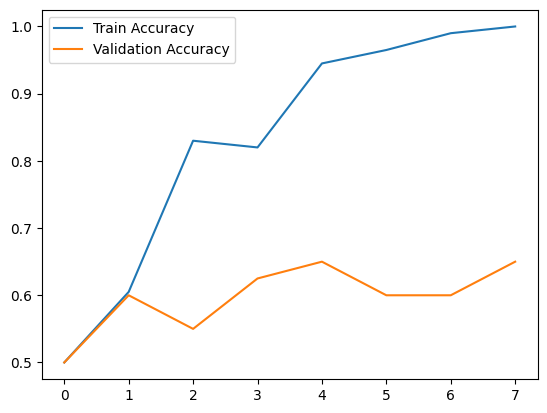

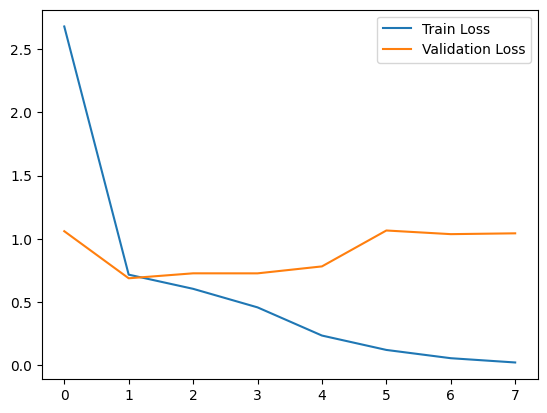

In [45]:
import matplotlib.pyplot as plt

# Візуалізація точності
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Візуалізація функції втрат
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


4. Оцінка результатів: Оцініть ефективність моделі за допомогою метрик класифікації (точність, доля правильних класифікацій, F1-міра тощо).

In [46]:
model_1.evaluate(test_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6417 - loss: 1.0753 


[1.0433998107910156, 0.6499999761581421]

ефективність 64%, потрібно більше даних для навчання та тестів